In [7]:
import geopandas as gpd
from shapely import ops
from shapely import geometry as geom
import os
import urllib
import pandas as pd
#from sjoin import sjoin
%matplotlib inline

In [4]:
### GET BOROUGH GEOJSON FILE FROM:
### https://github.com/dwillis/nyc-maps/raw/master/boroughs.geojson
#bb = gpd.read_file('neighborhoods.geojson')
#ng = gpd.read_file('neighborhoods.geojson')
#gpd.

zipgeojson = "https://github.com/YuHuaCheng/Map/raw/master/data/nyc-zip-code-tabulation-areas-polygons.geojson"
#zipgeojson = "https://github.com/dwillis/nyc-maps/raw/master/boroughs.geojson"
zipsfile = os.path.join("data",zipgeojson.split("/")[-1])

try:
    bb = gpd.read_file(zipsfile)
except OSError as e:
    urllib.request.urlretrieve(zipgeojson, zipsfile)
    
    #zips geojson had a var assignment that caused problems
    fin = open(zipsfile)
    
    lines = [line for line in fin]
    lines[0] = lines[0].replace("var nycdata = ", "")
    
    fin.close()
    
    fout = open(zipsfile, "w")
    for line in lines:
        fout.write(line)
    fout.flush()
    fout.close()
    
    bb = gpd.read_file(zipsfile)

bb.geometry

0      POLYGON ((-73.86942457284175 40.74915687096787...
1      POLYGON ((-73.71068374074007 40.75004039450917...
2      POLYGON ((-73.70098278625547 40.73889569923034...
3      POLYGON ((-73.72270447144122 40.75373371438336...
4      POLYGON ((-73.81088634744755 40.72717187575918...
5      POLYGON ((-73.88722098467157 40.72752618766134...
6      POLYGON ((-73.70098278625547 40.73889569923034...
7      POLYGON ((-73.8562474640478 40.7367227854824, ...
8      POLYGON ((-73.74168681424477 40.73682340115314...
9      POLYGON ((-73.86451198956482 40.73407164841783...
10     POLYGON ((-73.77010678596534 40.73177920848852...
11     POLYGON ((-73.77010678596534 40.73177920848852...
12     POLYGON ((-73.72774739596115 40.72258480474807...
13     POLYGON ((-73.80904031652176 40.71991162363268...
14     POLYGON ((-73.87190078471538 40.72685786441028...
15     POLYGON ((-73.72847847282661 40.72076557418165...
16     POLYGON ((-73.826059565848 40.71539860277048, ...
17     POLYGON ((-73.8260595658

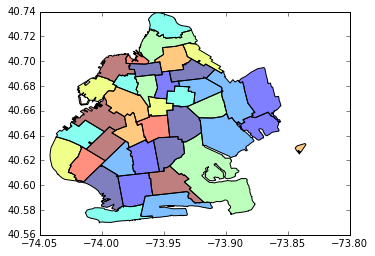

In [6]:
bk = bb[bb.CTY_FIPS == '047']
bk_reset_idx = bk.reset_index()
bk_reset_idx.plot()

In [17]:
mydf = pd.read_csv('checker.csv', sep ='\t')
pkBK = []
for i in range (len(mydf)):
    pkBK.append(geom.Point(mydf.pickup_longitude.iloc[i], mydf.pickup_latitude.iloc[i]))
len(pkBK)


50000

In [40]:
pp_BK = gpd.GeoSeries(pkBK)
#for i in range(len(pp_BK)):
pp_BK_df = pp_BK[pp_BK.convex_hull[1].within(bk_reset_idx.geometry) == True]
#pp_BK.convex_hull[1].convex_hull

AttributeError: 'GeoSeries' object has no attribute '_geom'

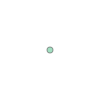

In [24]:
pp_BK[1]

In [ ]:
sum(bb.area)

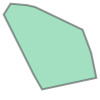

In [32]:
bb.geometry.convex_hull[1].convex_hull

In [ ]:
ops.unary_union(bb.geometry.convex_hull)

In [ ]:
bb.set_geometry(bb.geometry.buffer(0.01))

In [ ]:
bb.geometry[3]

In [ ]:
gpd.GeoSeries(avg).plot()

In [ ]:
avg = avg.convex_hull
gpd.GeoSeries(avg).plot()

In [ ]:
avg

In [ ]:
avg.area

In [ ]:
print avg.centroid

In [ ]:
points = [geom.Point(-73.94650690661533, 40.68857526610002)]
gs = gpd.GeoSeries(points)
gd = gpd.GeoDataFrame(geometry=gs)
gs

In [ ]:
gd.crs = bb.crs

In [ ]:
sjoin(gd, bb, how="left", op="within")